<a href="https://colab.research.google.com/github/Saniya-Firdous/IIITH_AI-ML_Labs_and_Projects/blob/main/AI_ML_Module_4_Lab_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron and Gradient Descent

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
%matplotlib inline

In [15]:
# Load the Banknote dataset
banknote = fetch_openml(name="banknote-authentication", version=1)

In [16]:
X = banknote.data
Y = banknote.target

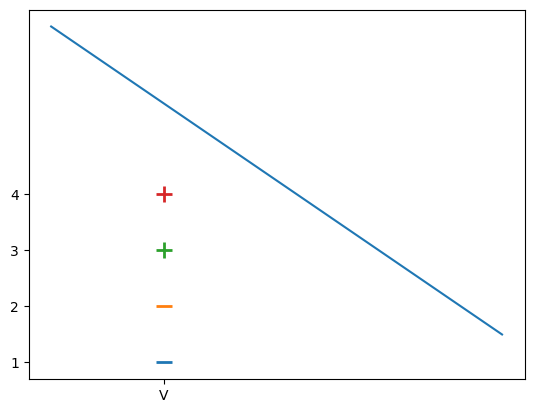

In [18]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

In [22]:
def perceptron_algo(X, Y, eta=1,epochs=10):
    w = np.zeros(len(X[0]))

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [45]:
def perceptron_algo_plot(X, Y, eta=0.1,epochs=30):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    errors = []

    for t in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title(f'Learning Rate:{eta}')

    return w

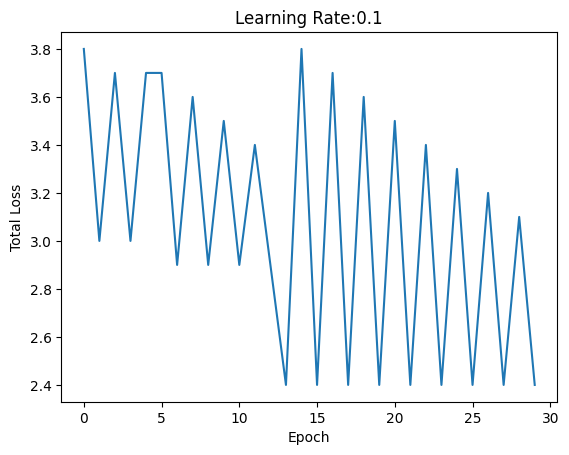

In [50]:
w = perceptron_algo_plot(X, y)

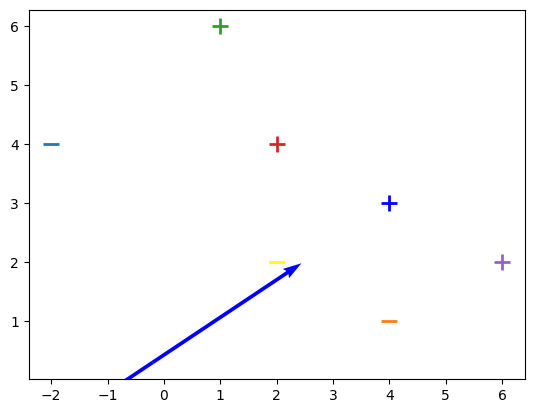

In [51]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

# Toy dataset that is not linearly separable

In [46]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [47]:
y = np.array([-1, -1, 1, -1, -1])

In [48]:
print(X.shape)
print(y.shape)

(5, 3)
(5,)


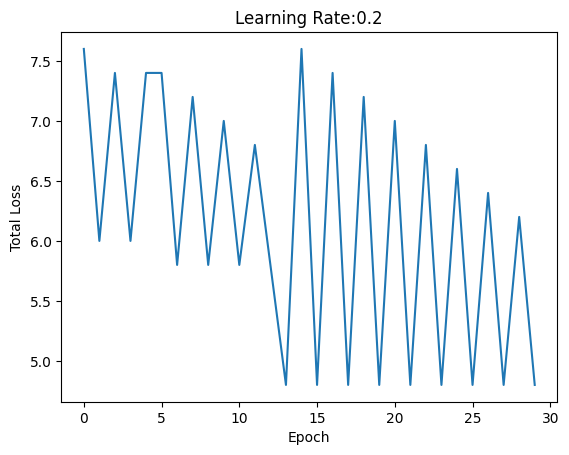

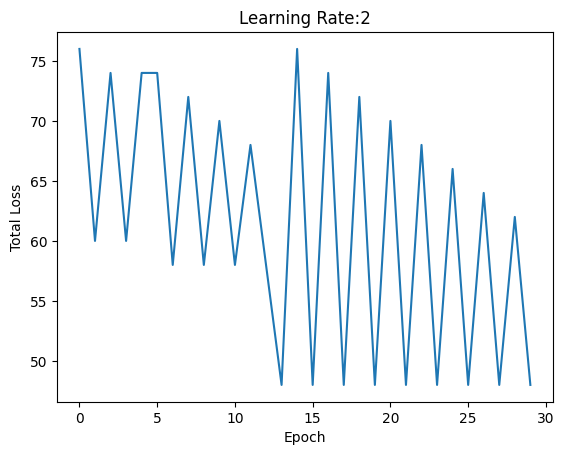

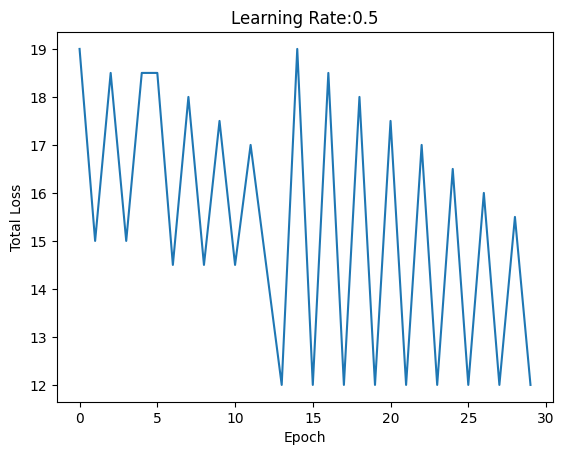

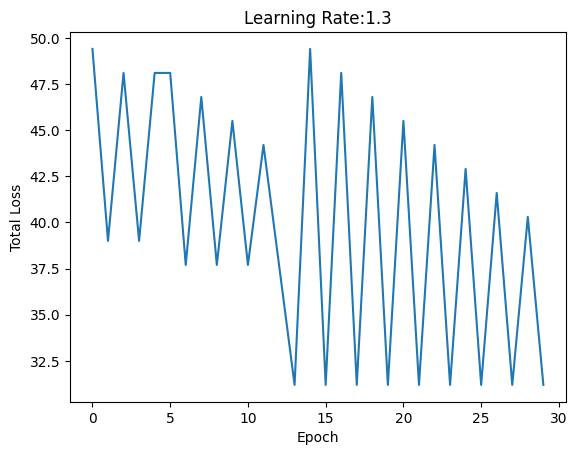

In [49]:
etas = [0.2, 2, 0.5, 1.3]
for eta in etas:
    w = perceptron_algo_plot(X, y, eta=eta)
    plt.show()